In [25]:
import numpy as np
import matplotlib.pyplot as plt

## 样例数据

In [26]:
originX = np.array([[62.47, 2.0], [65.78, 3.0], [58.05, 2.0], [52.09, 2.0], [74.98, 3.0], [55.87, 2.0], [90.66, 3.0], [113.68, 3.0], [97.92, 2.0], [46.33, 2.0], [134.55, 3.0], [151.15, 3.0], [63.01, 2.0], [65.66, 2.0], [108.81, 3.0], [66.19, 3.0], [54.1, 2.0], [73.44, 2.0], [51.78, 2.0], [92.42, 3.0], [59.13, 2.0], [49.49, 1.0], [51.68, 2.0], [52.87, 2.0], [69.46, 2.0], [76.41, 2.0], [63.1, 2.0], [197.37, 5.0], [93.53, 3.0], [91.35, 3.0], [103.49, 3.0], [45.12, 2.0], [59.59, 2.0], [174.66, 4.0], [35.8, 1.0], [91.35, 3.0], [55.07, 2.0], [119.44, 3.0], [65.85, 2.0], [72.05, 3.0], [85.98, 3.0], [103.29, 4.0], [184.05, 5.0], [90.87, 3.0], [38.83, 1.0], [51.65, 1.0], [50.14, 1.0]])
Y = np.array([[213.0], [226.0], [179.0], [188.0], [215.0], [152.0], [290.0], [375.0], [305.0], [166.0], [385.0], [500.0], [195.0], [200.0], [310.0], [205.0], [158.0], [270.0], [150.0], [310.0], [180.0], [200.0], [155.0], [178.0], [303.0], [250.0], [218.0], [630.0], [326.0], [310.0], [530.0], [138.0], [230.0], [560.0], [115.0], [400.0], [140.0], [547.0], [240.0], [250.0], [315.0], [330.0], [680.0], [302.0], [130.0], [162.0], [140.0]]) 

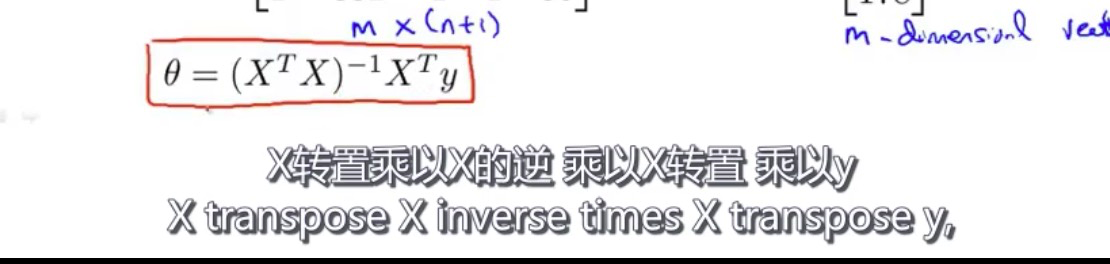

### 根据最小化J损失函数的方法
### 损失函数： $$ J(\theta_0,\theta_1,\theta_2,...,\theta_n) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 $$
我们如果想要求出最小值，其实就是不断对其求偏导，
而方程解也是这个过程，不过，最终可以重置偏导为0
但是，我们遇到了超线性方长的问题才是变量的常态，于是用最小二乘法完成这个过程

### $$ ( X^{T}X )^{-1} X^{T} Y $$
### 而这个下面这个计算过程就是广义的逆，或者伪逆
### $$ ( X^{T}X )^{-1} X $$

### 求出最小参数

转为二维矩阵模式，方便后面使用矩阵操作

In [27]:
originX = originX[:,:1]

## 构造矩阵 X

In [28]:
X = np.mat(np.c_[np.ones(originX.shape[0]),originX])

## 解出最小参数

In [29]:
def liner(X,Y):
  return np.dot(np.dot(np.dot(X.T,X).I,X.T),Y)

## 一元/多元方程解线性回归预测结果

In [30]:
def price(newX):
    '''
    基于ax+bx+c=y 求出对应的预测对应的 y 的值
    '''
    '''
    方法1
    b,c = tuple(np.squeeze(np.array(liner(X,Y))))
    expr = b+c*newX
    '''
    expr = np.dot(np.squeeze(np.array(liner(X,Y))),np.array(np.array([1]+newX)))
    return expr
    
'预测值：',price([170])

('预测值：', 585.209913541718)

## 回归条件为单变量时可运行

In [31]:
def plot_photo_2D():
    plt.scatter(originX,Y)
    Xs = [X.min(),X.max()]
    Ys = [price([Xs[0]]),price([Xs[1]])]
    plt.plot(Xs,Ys,c='r')

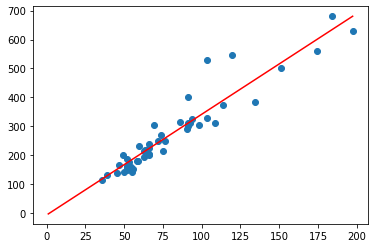

In [32]:
plot_photo_2D()